In [1]:
from matplotlib import pyplot
import pandas
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from numpy import mean, std

In [2]:
def load_dataset():
    dataset = pandas.read_csv("C:\\Users\\vumar\\Downloads\\devanagari-character-set\\digit_data.csv")
    trainX, testX, trainY, testY = train_test_split(dataset[dataset.columns[:-1]], dataset.character, test_size=0.3, random_state=42)
    trainX = trainX.to_numpy()
    trainX = trainX.reshape((trainX.shape[0], 1024, 1))
    testX= testX.to_numpy()
    testX = testX.reshape((testX.shape[0], 1024, 1))
    trainY = pandas.get_dummies(trainY)
    testY = pandas.get_dummies(testY)
    trainY = trainY.to_numpy()
    testY = testY.to_numpy()
    return trainX, trainY, testX, testY

In [3]:
def define_model():
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', kernel_initializer='he_uniform', input_shape=(1024, 1)))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def evaluate_model(dataX, dataY, n_folds=5):
    scores, histories = list(), list()
    kfold = KFold(n_folds, shuffle=True, random_state=1)
    for train_ix, test_ix in kfold.split(dataX):
        model = define_model()
        
        trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
        history = model.fit(trainX, trainY, epochs=5, batch_size=32, validation_data=(testX, testY), verbose=1)
        
        _, acc = model.evaluate(testX, testY, verbose=1)
        print('> %.3f' % (acc * 100.0))
        
        scores.append(acc)
        histories.append(history)
    return scores, histories

In [5]:
# plot diagnostic learning curves
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        pyplot.subplot(2, 1, 1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
        # plot accuracy
        pyplot.subplot(2, 1, 2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
        pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
    pyplot.show()
 
# summarize model performance
def summarize_performance(scores):
    # print summary
    print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
    # box and whisker plots of results
    pyplot.boxplot(scores)
    pyplot.show()

In [6]:
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # evaluate model
    scores, histories = evaluate_model(trainX, trainY)
    # learning curves
    summarize_diagnostics(histories)
    # summarize estimated performance
    summarize_performance(scores)

Train on 11200 samples, validate on 2800 samples
Epoch 1/5
11200/11200 [==============================] - 14s 1ms/sample - loss: 673.0835 - accuracy: 0.0989 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 2/5
11200/11200 [==============================] - 15s 1ms/sample - loss: 2.3035 - accuracy: 0.0968 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 3/5
11200/11200 [==============================] - 14s 1ms/sample - loss: 2.3034 - accuracy: 0.0992 - val_loss: 2.3032 - val_accuracy: 0.0986
Epoch 4/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3033 - accuracy: 0.0977 - val_loss: 2.3047 - val_accuracy: 0.0954
Epoch 5/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3035 - accuracy: 0.0992 - val_loss: 2.3030 - val_accuracy: 0.0954
2800/1 [=========================================================================================================================================================================================================

> 9.536
Train on 11200 samples, validate on 2800 samples
Epoch 1/5
11200/11200 [==============================] - 18s 2ms/sample - loss: 554.9771 - accuracy: 0.0976 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 2/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3034 - accuracy: 0.0986 - val_loss: 2.3031 - val_accuracy: 0.0993
Epoch 3/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3035 - accuracy: 0.0969 - val_loss: 2.3031 - val_accuracy: 0.0993
Epoch 4/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3036 - accuracy: 0.0915 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 5/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3032 - accuracy: 0.0992 - val_loss: 2.3028 - val_accuracy: 0.1000
2800/1 [=================================================================================================================================================================================================

> 10.000
Train on 11200 samples, validate on 2800 samples
Epoch 1/5
11200/11200 [==============================] - 18s 2ms/sample - loss: 653.8685 - accuracy: 0.0981 - val_loss: 2.3043 - val_accuracy: 0.0975
Epoch 2/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3036 - accuracy: 0.0965 - val_loss: 2.3035 - val_accuracy: 0.0996
Epoch 3/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3034 - accuracy: 0.0962 - val_loss: 2.3034 - val_accuracy: 0.0996
Epoch 4/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3033 - accuracy: 0.0996 - val_loss: 2.3029 - val_accuracy: 0.0996
Epoch 5/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3033 - accuracy: 0.0953 - val_loss: 2.3036 - val_accuracy: 0.0936
2800/1 [================================================================================================================================================================================================

> 9.357
Train on 11200 samples, validate on 2800 samples
Epoch 1/5
11200/11200 [==============================] - 17s 2ms/sample - loss: 281.1896 - accuracy: 0.1004 - val_loss: 2.3038 - val_accuracy: 0.1046
Epoch 2/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3035 - accuracy: 0.1012 - val_loss: 2.3039 - val_accuracy: 0.0896
Epoch 3/5
11200/11200 [==============================] - 17s 2ms/sample - loss: 2.3035 - accuracy: 0.0994 - val_loss: 2.3032 - val_accuracy: 0.1046
Epoch 4/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3033 - accuracy: 0.1006 - val_loss: 2.3032 - val_accuracy: 0.1000
Epoch 5/5
11200/11200 [==============================] - 17s 2ms/sample - loss: 2.3034 - accuracy: 0.0968 - val_loss: 2.3043 - val_accuracy: 0.0896
2800/1 [=================================================================================================================================================================================================

> 8.964
Train on 11200 samples, validate on 2800 samples
Epoch 1/5
11200/11200 [==============================] - 18s 2ms/sample - loss: 471.1076 - accuracy: 0.0943 - val_loss: 2.3039 - val_accuracy: 0.0989
Epoch 2/5
11200/11200 [==============================] - 16s 1ms/sample - loss: 2.3034 - accuracy: 0.0962 - val_loss: 2.3037 - val_accuracy: 0.0907
Epoch 3/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3034 - accuracy: 0.1003 - val_loss: 2.3040 - val_accuracy: 0.0986
Epoch 4/5
11200/11200 [==============================] - 17s 2ms/sample - loss: 2.3034 - accuracy: 0.0998 - val_loss: 2.3032 - val_accuracy: 0.0975
Epoch 5/5
11200/11200 [==============================] - 17s 1ms/sample - loss: 2.3032 - accuracy: 0.1014 - val_loss: 2.3040 - val_accuracy: 0.0986
2800/1 [=================================================================================================================================================================================================

> 9.857


C:\Users\vumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """
C:\Users\vumar\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


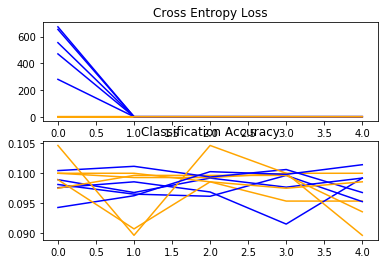

Accuracy: mean=9.543 std=0.368, n=5


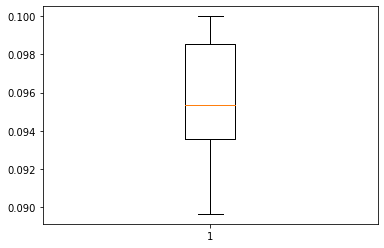

In [7]:
run_test_harness()